<a href="https://colab.research.google.com/github/LlanosAdan/Data-Science-and-Analysis/blob/main/Clasificaci%C3%B3n_log%C3%ADstica_y_regresi%C3%B3n_notas_de_alumnos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objetivo:
En este modelo de clasificación, se utilizará un dataset pequeño, creado manualmente, que contiene las notas de más de 50 alumnos. El propósito es practicar técnicas de machine learning, específicamente clasificación logística.

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

**Etapa 1. Analizo el data set**

In [5]:
df_alumnos = pd.read_csv('clasificacion_alumnos.csv')
df_alumnos.head()

,Nombre,Nota1,Nota2,Nota3,Aprobado
0,Alumno1,7,8,9,1
1,Alumno2,4,5,6,0
2,Alumno3,6,7,8,1
3,Alumno4,3,4,5,0
4,Alumno5,8,9,10,1


/usr/local/lib/python3.11/dist-packages/numpy/lib/_nanfunctions_impl.py:1634: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,


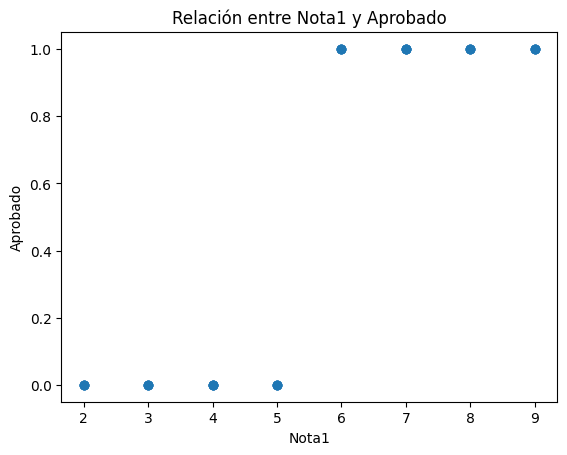

In [37]:
sns.regplot(x='Nota1', y='Aprobado', data=df_alumnos, logistic=True)
plt.title('Relación entre Nota1 y Aprobado')
plt.show()    # En el gráfico usamos una regresión logística, la cual nos muestra como cambia la probabilidad de aprobar según la Nota1.
# Se observa que los alumnos con notas bajas tienden a desaprobar (valor cercano a 0),
# mientras que a mayor nota, aumenta la probabilidad de aprobación (valor cercano a 1).


In [6]:
df_alumnos.isnull().sum()   #Observo si hay algun valor nulo

,0
Nombre,0
Nota1,0
Nota2,0
Nota3,0
Aprobado,0


**Etapa 2**. Como no hay ningun valor nulo prosigo con la creacion del modelo de clasifcacion

In [7]:
#Separamos las variables x que usaremos para predecir la variable Y la cual sera clasifaciones
x = df_alumnos[['Nota1', 'Nota2', 'Nota3']]
y = df_alumnos['Aprobado']

In [8]:
#Separamos los datos de test y entrenamiento
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
#Una vez separado los datos, entrenamos el modelo.
modelo = LogisticRegression()
modelo.fit(x_train, y_train)

LogisticRegression()

**Etapa 3.** Hacemos uso del modelo echo, para los datos_test que separamos anteriormente.

In [13]:
#Ahora usare el modelo entrenado para los datos test
predicciones = modelo.predict(x_test)

In [14]:
print('Precision :', accuracy_score(y_test, predicciones)) #Para ver la precision de acierto en decimal.

Precision : 0.9


In [17]:
print('Porcentaje de precisión:', int(accuracy_score(y_test, predicciones) * 100)) #Porcentaje de precicion en entero.


Porcentaje de precisión: 90


**Una vez realizado el modelo y comprobado el porcentaje de acierto positivo, podemos proseguir a ingresar nuevos datos, como un alumno nuevo y veamos si este aprueba 1 o no 0.**

In [34]:
nuevo_alumno = pd.DataFrame([[5, 10, 8]], columns=['Nota1', 'Nota2', 'Nota3'])
nuevo_alumno

,Nota1,Nota2,Nota3
0,5,10,8


In [35]:
modelo.predict(nuevo_alumno)   #Vemos el resultado 1 para confirmar de que si aprueba el nuevo_alumno con las notas ingresadas, caso contrario nos arrojara 0 para el No.

array([1])